In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
dataset = pd.read_csv('Advertising.csv')
dataset

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [150]:
dataset = dataset.drop(columns=['Unnamed: 0'])
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [151]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [152]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [153]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

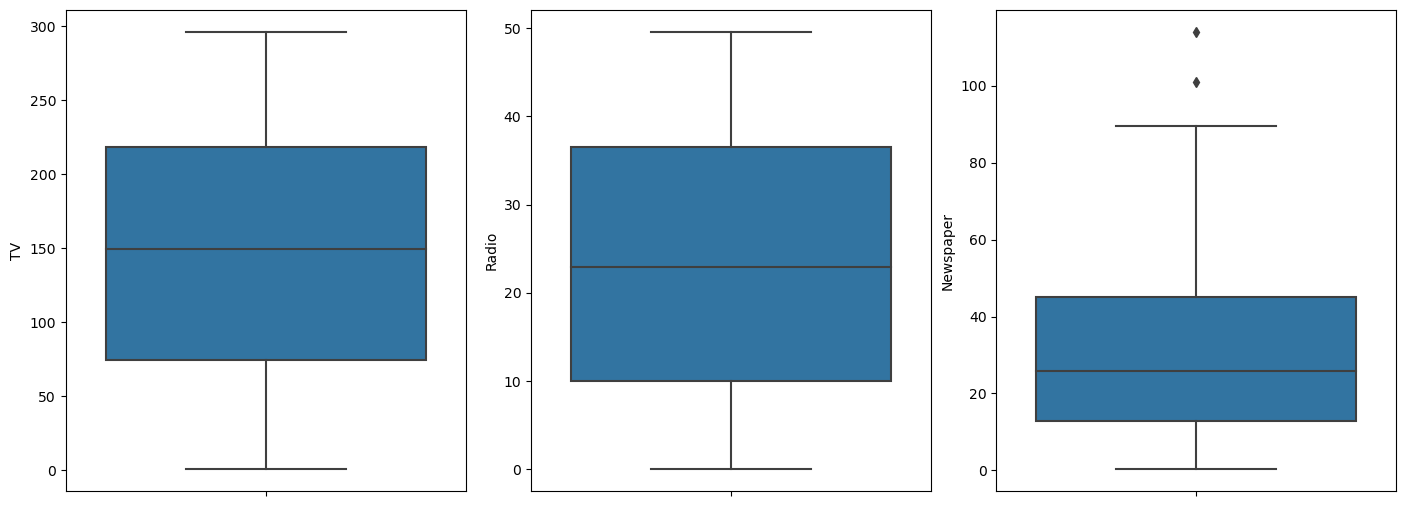

In [154]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(14,5))
index = 0
ax = ax.flatten()

for col,value in dataset.items():
    if index<3:
        sns.boxplot(y=col, data=dataset, ax= ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

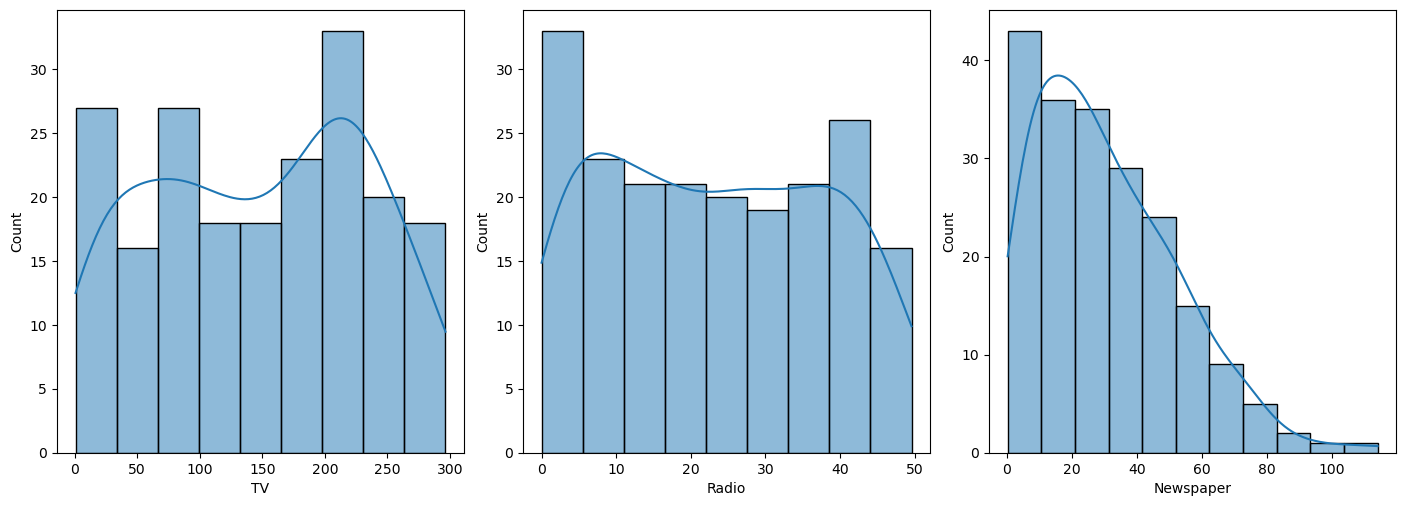

In [155]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(14,5))
index = 0
ax = ax.flatten()

for col,value in dataset.items():
    if index<3:
        sns.histplot(data=value, ax= ax[index], kde=True)
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

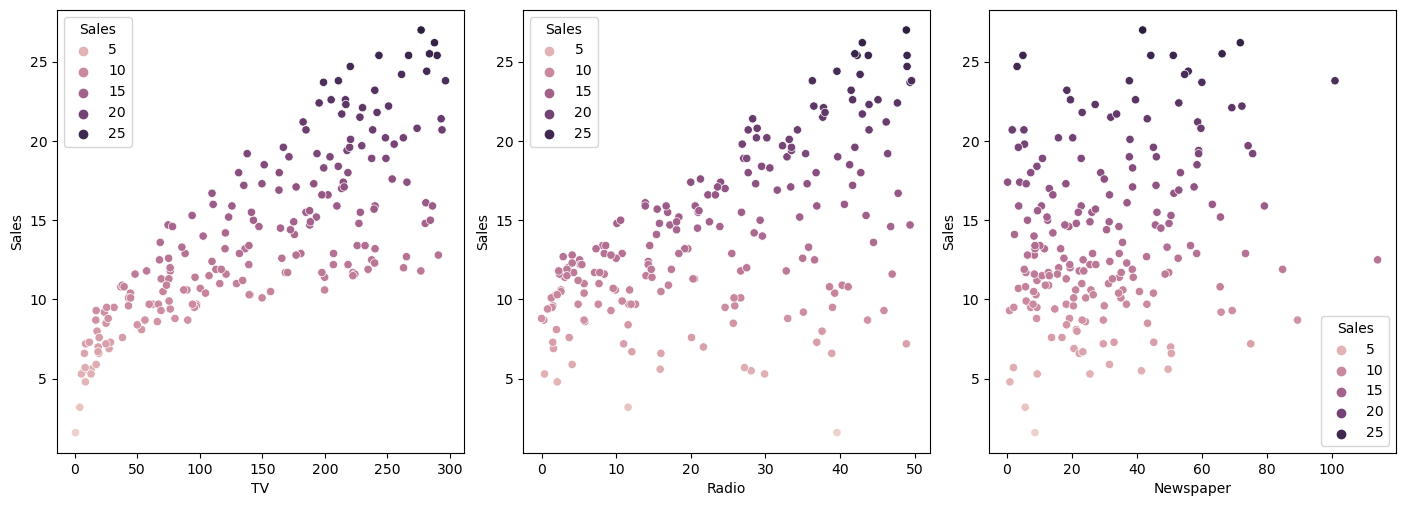

In [156]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(14,5))
ax = ax.flatten()

for index in range(len(dataset.columns)):
    if index < len(dataset.columns)-1:
        sns.scatterplot(x=dataset.columns[index],y='Sales',data=dataset, ax= ax[index],hue='Sales')
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [157]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_y = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1,1))

In [158]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [159]:
X[0:5]

array([[0.77578627, 0.76209677, 0.60598065],
       [0.1481231 , 0.79233871, 0.39401935],
       [0.0557998 , 0.92540323, 0.60686016],
       [0.50997633, 0.83266129, 0.51187335],
       [0.60906324, 0.21774194, 0.51099384]])

In [160]:
y[0:5]

array([[0.80708661],
       [0.34645669],
       [0.30314961],
       [0.66535433],
       [0.44488189]])

In [161]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lin_pred = lin_reg.predict(X_test)

In [162]:
from sklearn.metrics import mean_squared_error
print("Linear Regression Root Mean Squared Error:",mean_squared_error(y_test,lin_pred,squared=False))

Linear Regression Root Mean Squared Error: 0.055564636057407794


In [163]:
from sklearn.ensemble import RandomForestRegressor
rand_reg = RandomForestRegressor(random_state=1)
rand_reg.fit(X_train,y_train)
rand_pred = rand_reg.predict(X_test)

C:\Users\Awais Tanveer Khan\AppData\Local\Temp\ipykernel_11524\813637630.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_reg.fit(X_train,y_train)


In [164]:
from sklearn.metrics import mean_squared_error
print("Random Forest Root Mean Squared Error:",mean_squared_error(y_test,rand_pred,squared=False))

Random Forest Root Mean Squared Error: 0.02714351013207915


In [165]:
scaler_y.inverse_transform(rand_reg.predict(scaler.transform([['233','40','70']])).reshape(-1,1))

array([[22.488]])